<a href="https://colab.research.google.com/github/younes-code/Calilfornia-housing-data-tensorFlow/blob/main/Calilfornia_housing_data_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [ ]:
# Bring the data.
housing_data = fetch_california_housing(as_frame=True)

In [ ]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [ ]:
housing_data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_data.frame.shape

(20640, 9)

In [ ]:
housing_data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [ ]:
#cheking missing values
housing_data.frame.isnull().sum().sum()

0

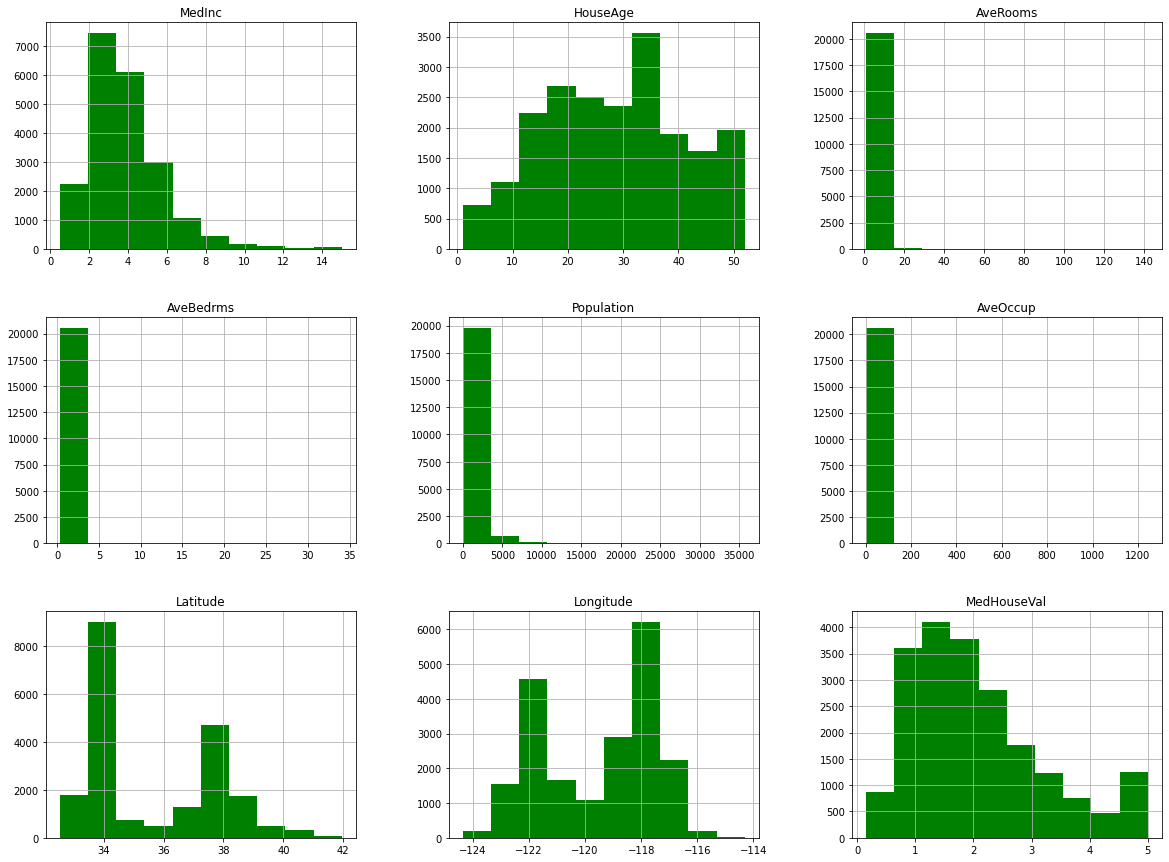

In [ ]:
housing_data.frame.hist(figsize=(20,15), color = 'green')
plt.show()

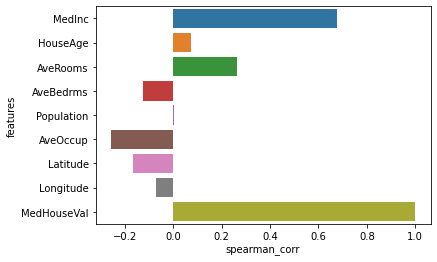

In [ ]:
import seaborn as sns
corr=pd.DataFrame()
corr["features"]=housing_data.frame.columns
corr["spearman_corr"]=[housing_data.frame[column].corr(housing_data.frame.MedHouseVal,"spearman") for column in housing_data.frame]

sns.barplot(x="spearman_corr",y="features",orient="h",data=corr)

In [ ]:
values=np.random.rand(2)
b1 = tf.Variable(values [0])                # A constant initial value.
b0 = tf.Variable(values[1]) 

In [ ]:

X_ph = tf.placeholder(tf.float64, shape=(None))                # We don't need to fix the number of observations.
y_ph = tf.placeholder(tf.float64, shape=(None))  

In [ ]:
y_model = b0 + b1*X_ph                                         # Simple linear regression model. 

In [ ]:
loss = tf.reduce_mean(tf.square(y_ph - y_model))          #  loss function.

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# optimizer = tf.train.MomentumOptimizer(learning_rate = 0.001, momentum=0.9)   # Momentum optimizer.

In [ ]:
n_epochs = 5000                                                   # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                         # Define training.
init = tf.global_variables_initializer()                 # Define Variable initialization.

with tf.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        my_feed = {X_ph:housing_data.frame['MedInc'], y_ph:housing_data.frame['MedHouseVal']}                        # Prepare feed data as a dictionary. 
        for i in range(n_epochs):
            sess.run(train, feed_dict = my_feed)
        b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
        # Testing.
        
        mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.

In [ ]:
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 0.400 , b1 = 0.429


In [ ]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 0.702
RMSE = 0.838
